In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from kymatio import Scattering2D
%matplotlib inline
import os 
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style 
import matplotlib.pyplot as plt
import matplotlib
style.use('seaborn-whitegrid')
matplotlib.rcParams['font.family'] = "sans-serif"
#sns.set_context('talk',font_scale=.75) 

In [3]:
torch.cuda.is_available()

True

### Load MNIST data

In [26]:
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
batch_size = 100
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

In [13]:
len(trainset),len(testset)

(60000, 10000)

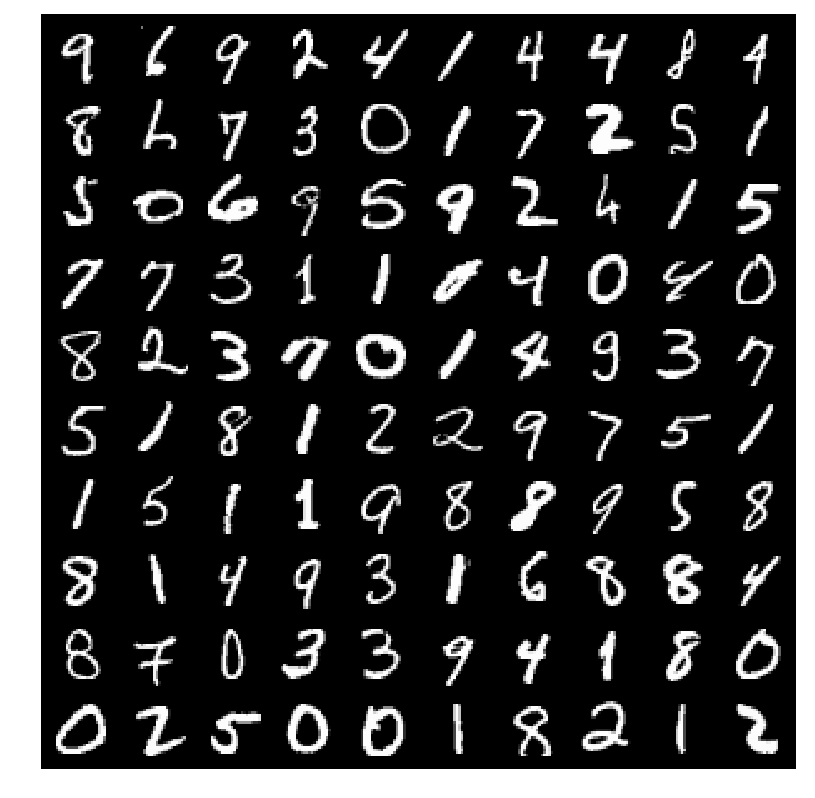

In [36]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images[:100,:,:,:]
images = images / 2 + 0.5
plt.figure(figsize=(10,10),dpi=100)
plt.imshow(np.transpose(torchvision.utils.make_grid(images,nrow=10).numpy(),(1,2,0)))
plt.axis('off')
plt.show()

###  Feature extraction by scattering net with known invariants;

In [7]:
scattering = Scattering2D(J=2, shape=(28, 28), max_order=1)
K = 17
scattering = scattering.cuda()

In [14]:
Sdata = np.zeros((len(trainset),833)) # 17*7*7
Slabel = np.zeros((len(trainset),1))
Sdata.shape,Slabel.shape

((60000, 833), (60000, 1))

In [15]:
for batch_idx, (data, target) in enumerate(trainloader):
    print(batch_idx,end=',')
    data = data.to('cuda')
    sdata = scattering(data)
    Sdata[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = sdata.to('cpu').numpy().reshape(batch_size,-1)
    Slabel[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = target.numpy().reshape(batch_size,-1)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

In [16]:
test = scattering(data).to('cpu').numpy()[0]

In [19]:
test.shape

(1, 17, 7, 7)

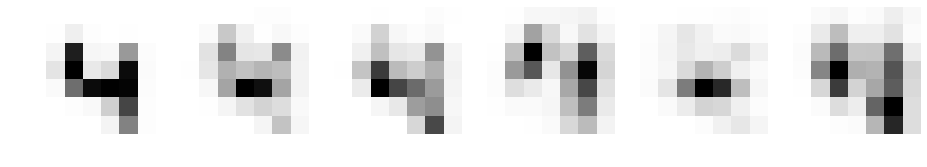

In [20]:
plt.figure(figsize=(16,2.5))
plt.subplot(161)
plt.imshow(test[0,0,:,:])
plt.axis('off')
plt.subplot(162)
plt.imshow(test[0,3,:,:])
plt.axis('off')
plt.subplot(163)
plt.imshow(test[0,6,:,:])
plt.axis('off')
plt.subplot(164)
plt.imshow(test[0,9,:,:])
plt.axis('off')
plt.subplot(165)
plt.imshow(test[0,12,:,:])
plt.axis('off')
plt.subplot(166)
plt.imshow(test[0,15,:,:])
plt.axis('off')
plt.show()

In [70]:
#np.save('MNIST_Scattering',Sdata)
#np.save('MNIST_Scattering_label',Slabel)
Sdata.shape,Slabel.shape

((60000, 833), (60000, 1))

### Visualize these features using classical unsupervised learning methods

In [64]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f6205abf320>>
Traceback (most recent call last):
  File "/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


In [22]:
Sdata_pca_embedded = PCA(n_components=2).fit_transform(Sdata)  

In [ ]:
Sdata_tsne_embedded = TSNE(n_components=2).fit_transform(Sdata)

In [26]:
Sdata_pca_embedded.shape, Sdata_tsne_embedded.shape

((60000, 2), (60000, 2))

In [27]:
Sdata_pca_embedded_df = pd.DataFrame(Sdata_pca_embedded,index=Slabel)
Sdata_pca_embedded_df = Sdata_pca_embedded_df.reset_index()
Sdata_tsne_embedded_df = pd.DataFrame(Sdata_tsne_embedded,index=Slabel)
Sdata_tsne_embedded_df = Sdata_tsne_embedded_df.reset_index()

In [33]:
Sdata_pca_embedded_df['index'] = Sdata_pca_embedded_df['index'].astype(int)
Sdata_tsne_embedded_df['index'] = Sdata_tsne_embedded_df['index'].astype(int)

In [61]:
Sdata_pca_embedded_df_plot = Sdata_pca_embedded_df.loc[range(10000),:]
Sdata_tsne_embedded_df_plot = Sdata_tsne_embedded_df.loc[range(10000),:]
Sdata_pca_embedded_df_plot.columns = ['Label','PCA Dim1', 'PCA Dim2']
Sdata_tsne_embedded_df_plot.columns = ['Label','tSNE Dim1', 'tSNE Dim2']

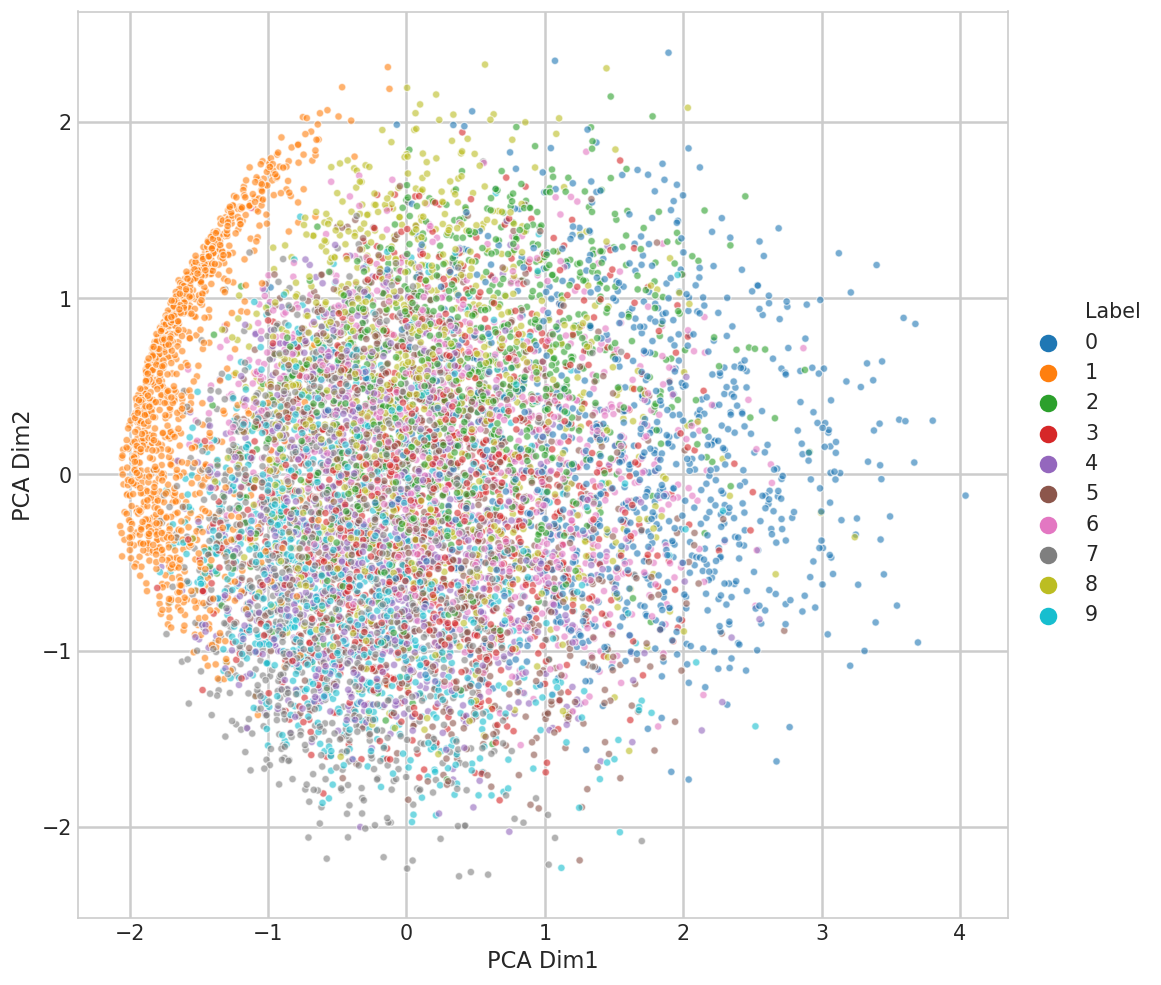

In [134]:
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='PCA Dim1', y='PCA Dim2',hue='Label',data=Sdata_pca_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

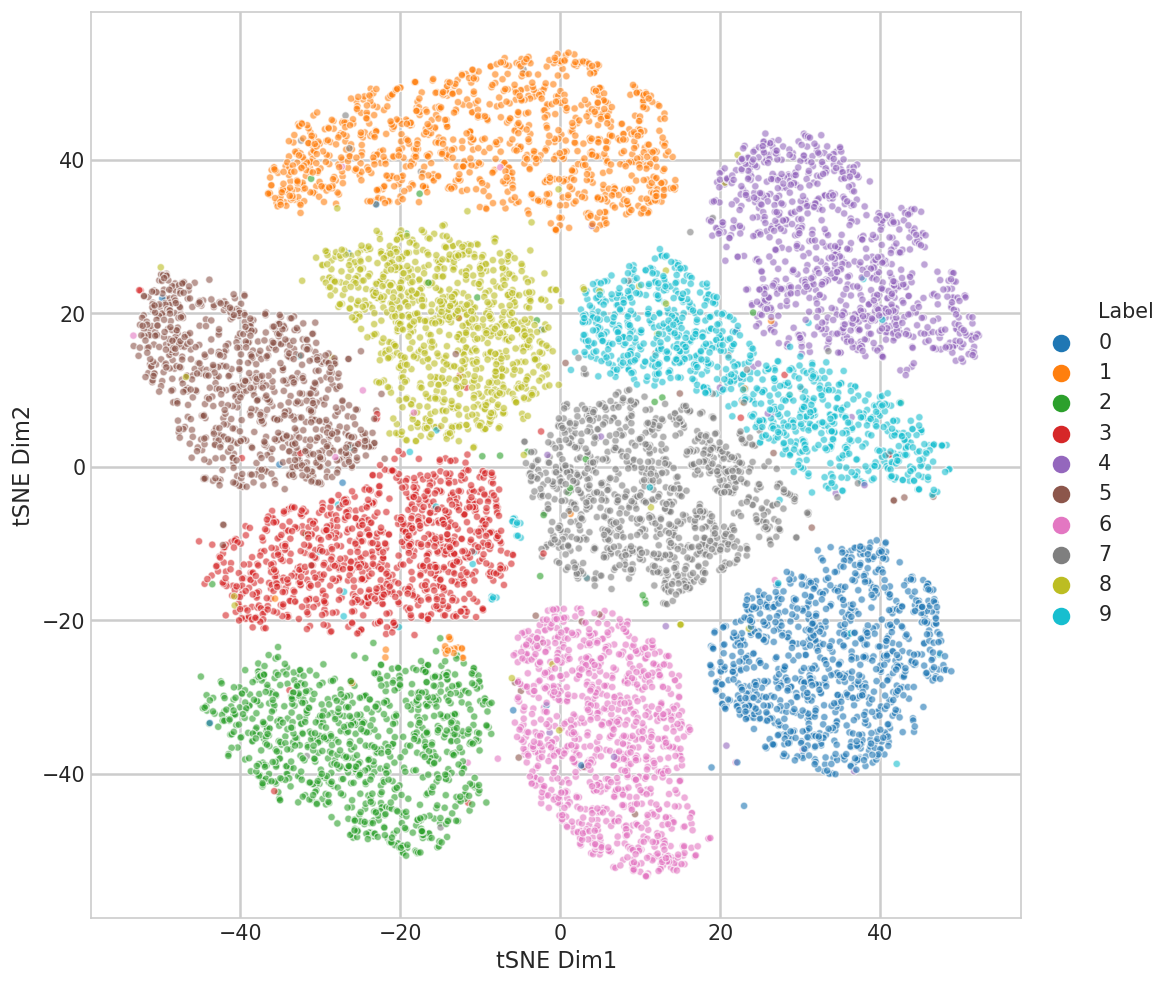

In [135]:
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='tSNE Dim1', y='tSNE Dim2',hue='Label',data=Sdata_tsne_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

### Image classifications using traditional supervised learning methods based on the features extracted

In [71]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
logr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logr_results = cross_validate(logr, Sdata[:10000], Slabel[:10000], cv=3, scoring='accuracy')
logr_results = logr_results['test_score']

/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning

In [104]:
lin_clf = svm.LinearSVC()
svm_results = cross_validate(lin_clf, Sdata[:10000], Slabel[:10000], cv=3, scoring='accuracy')
svm_results = svm_results['test_score']

/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWar

In [105]:
randomf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
randomf_results = cross_validate(randomf, Sdata[:10000], Slabel[:10000], cv=3, scoring='accuracy')
randomf_results = randomf_results['test_score']

/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [106]:
decisiont = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
decisiont_results = cross_validate(decisiont, Sdata[:10000], Slabel[:10000], cv=3, scoring='accuracy')
decisiont_results = decisiont_results['test_score']

In [107]:
adab = AdaBoostClassifier(n_estimators=100)
adab_results = cross_validate(adab, Sdata[:10000], Slabel[:10000], cv=3, scoring='accuracy')
adab_results = adab_results['test_score']

/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
gradb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gradb_results = cross_validate(gradb, Sdata[:10000], Slabel[:10000].astype(int), cv=3, scoring='accuracy')
gradb_results = gradb_results['test_score']

/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
reg_res = np.concatenate((logr_results,svm_results,randomf_results,decisiont_results,
                          adab_results,gradb_results)).reshape(-1,3).T

In [149]:
reg_res_df = pd.DataFrame(reg_res,columns=['Logistic\nRegression','SVM','Random\nforest',
                                           'Decision\ntree','Adaboost','Gradient\nboosting'])

In [264]:
#reg_res_df.to_csv('Scatternet_Classifier_res.csv',index=None)

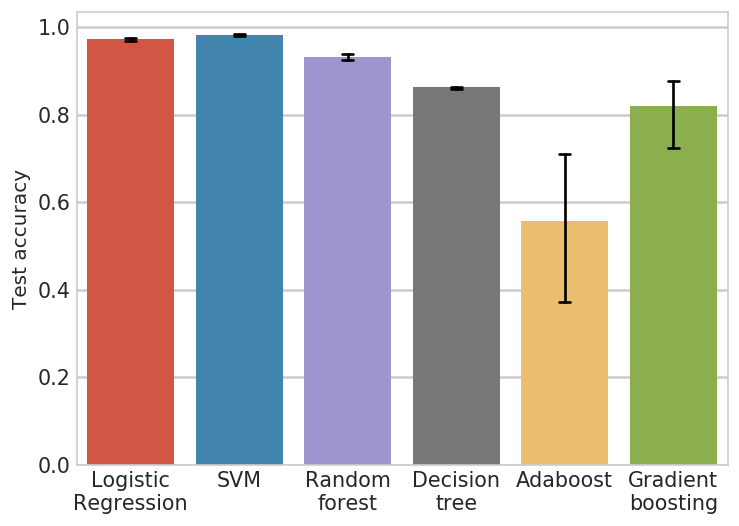

In [161]:
plt.figure(figsize=(7,5),dpi=120)
ax = sns.barplot(data=reg_res_df,errwidth=1.6,capsize=.1,errcolor='k',saturation=.8)
ax.set_ylabel('Test accuracy')
plt.show()

### Feature extraction by pre-trained deep neural networks

In [31]:
import torchvision.models as models

In [32]:
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
resnet18 = models.resnet18(pretrained=True)

In [75]:
alexnet.to('cuda')
#vgg16.to('cuda')
#resnet18.to('cuda')
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [55]:
normalize = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
grey2rgb = transforms.Lambda(lambda x: x.repeat(3, 1, 1))


transform_pretrain = transforms.Compose([transforms.Resize((224, 224),interpolation=2),
                                         transforms.ToTensor(),
                                         grey2rgb,
                                         normalize
                                         ])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform_pretrain)
batch_size = 20
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform_pretrain)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

In [56]:
Alexdata = np.zeros((1000,256*6*6)) 
Alexlabel = np.zeros((1000,1))
Alexdata.shape,Alexlabel.shape

((1000, 9216), (1000, 1))

In [58]:
##
# only use first 1000 data as example
##

for batch_idx, (data, target) in enumerate(trainloader):
    print(batch_idx,end=',')
    if batch_idx == 1000/batch_size:
        break
    data = data.to('cuda')
    sdata = alexnet.features[:13](data)
    Alexdata[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = \
        sdata.detach().to('cpu').numpy().reshape(batch_size,-1)
    Alexlabel[batch_size*batch_idx:(batch_idx+1)*batch_size,:] = target.numpy().reshape(batch_size,-1)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

In [ ]:
Alexdata_pca_embedded = PCA(n_components=2).fit_transform(Alexdata)  
Alexdata_tsne_embedded = TSNE(n_components=2).fit_transform(Alexdata)
Alexdata_pca_embedded_df = pd.DataFrame(Alexdata_pca_embedded,index=Alexlabel)
Alexdata_pca_embedded_df = Alexdata_pca_embedded_df.reset_index()
Alexdata_tsne_embedded_df = pd.DataFrame(Alexdata_tsne_embedded,index=Alexlabel)
Alexdata_tsne_embedded_df = Alexdata_tsne_embedded_df.reset_index()
Alexdata_pca_embedded_df['index'] = Alexdata_pca_embedded_df['index'].astype(int)
Alexdata_tsne_embedded_df['index'] = Alexdata_tsne_embedded_df['index'].astype(int)

In [67]:
Alexdata_pca_embedded_df_plot = Alexdata_pca_embedded_df
Alexdata_tsne_embedded_df_plot = Alexdata_tsne_embedded_df
Alexdata_pca_embedded_df_plot.columns = ['Label','PCA Dim1', 'PCA Dim2']
Alexdata_tsne_embedded_df_plot.columns = ['Label','tSNE Dim1', 'tSNE Dim2']

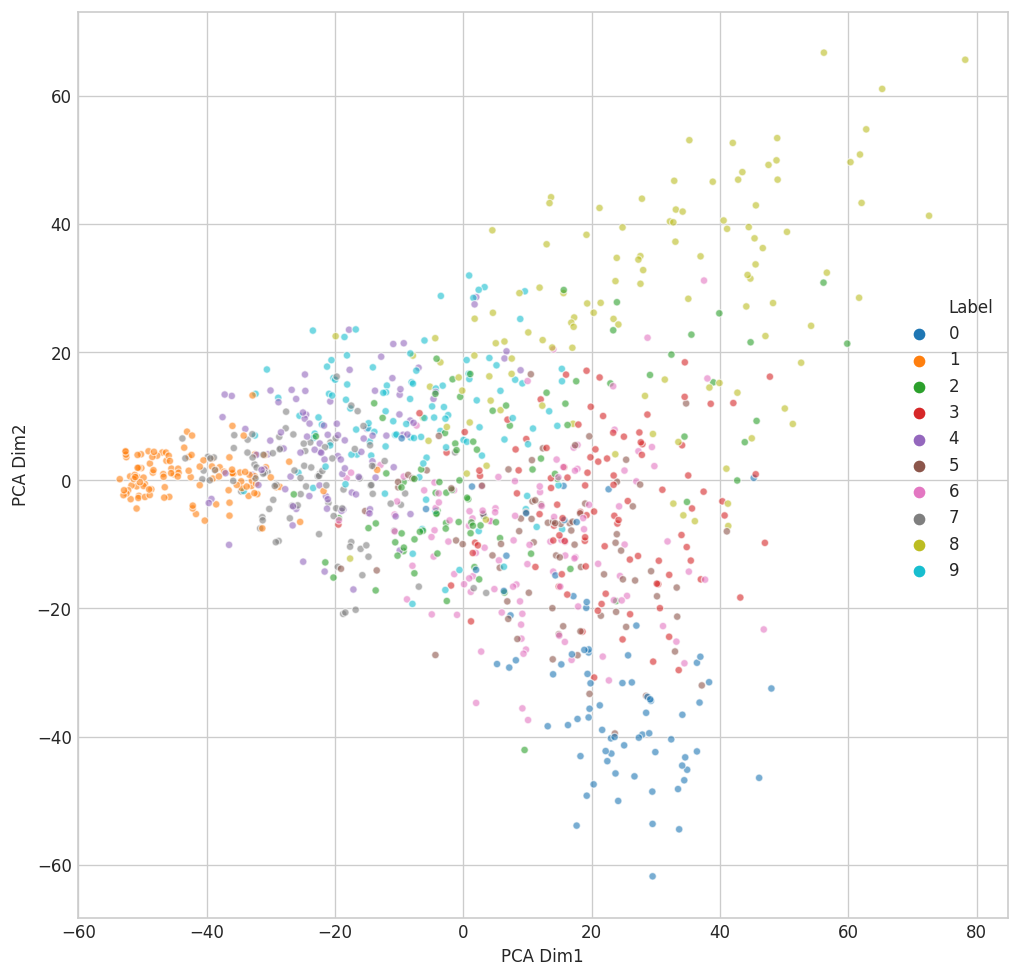

In [68]:
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='PCA Dim1', y='PCA Dim2',hue='Label',data=Alexdata_pca_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

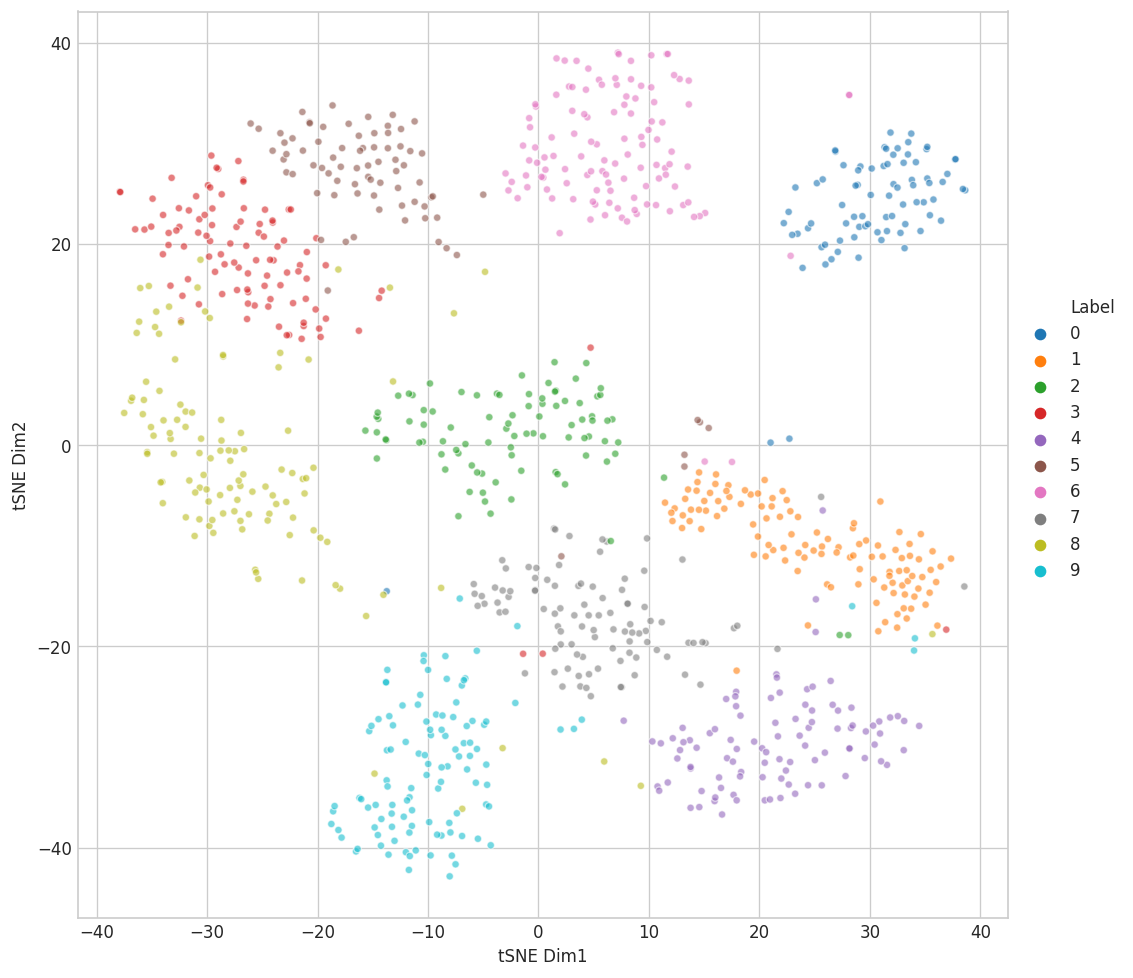

In [69]:
plt.figure(figsize=(10,10),dpi=120)
ax = sns.scatterplot(x='tSNE Dim1', y='tSNE Dim2',hue='Label',data=Alexdata_tsne_embedded_df_plot,
                     palette='tab10',alpha=0.6,s=20,legend='full')
legend = plt.legend(bbox_to_anchor=(1.001, 0.7),facecolor='white',edgecolor='white')
plt.show()

In [74]:
logr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logr_results = cross_validate(logr, Alexdata, Alexlabel, cv=3, scoring='accuracy')
logr_results = logr_results['test_score']
logr_results

/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jxiaoae/.conda/envs/jupy3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning

array([0.98813056, 0.97297297, 0.94545455])